In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [4]:
fig = px.histogram(df, x="Score")
fig.update_layout(title_text='Product Score')
fig.show()

In [5]:
df.shape

(568454, 10)

In [24]:
text = np.array(df["Text"])
text = text[0:5001]

In [31]:
df = df.iloc[0:5001, :]

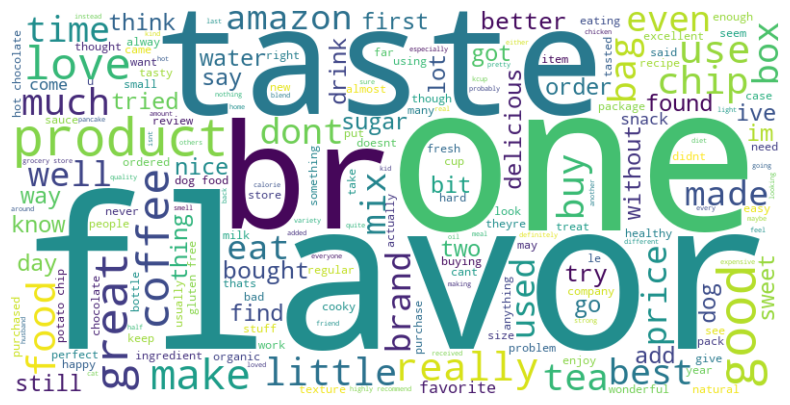

In [25]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Объединение отзывов в одну строку
textt = " ".join(review for review in text)

# Предварительная обработка текста
textt = re.sub(r'[^\w\s]', '', textt)  # удаление пунктуации
textt = textt.lower()  # приведение к нижнему регистру

# Токенизация текста
tokens = word_tokenize(textt)

# Удаление стоп-слов
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Лемматизация
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Объединение лемматизированных слов обратно в строку
processed_text = ' '.join(lemmatized_tokens)

# Создание wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Отображение wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

In [33]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1

In [34]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

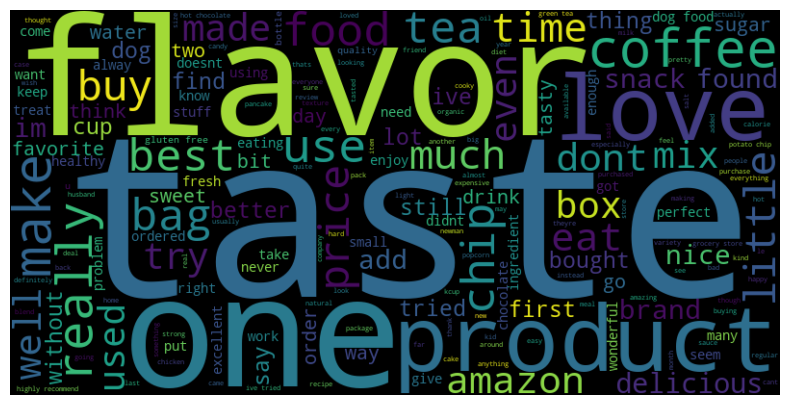

In [39]:
pos = " ".join(review for review in positive['Text'])

pos = re.sub(r'[^\w\s]', '', pos)  # удаление пунктуации
pos = pos.lower()  # приведение к нижнему регистру

tokens = word_tokenize(pos)

stop_words = set(stopwords.words('english'))
stop_words.update(["br", "href","good","great"]) 
filtered_tokens = [word for word in tokens if word not in stop_words]

# Лемматизация
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Объединение лемматизированных слов обратно в строку
processed_text = ' '.join(lemmatized_tokens)

# Создание wordcloud
wordcloud2 = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

# Отображение wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

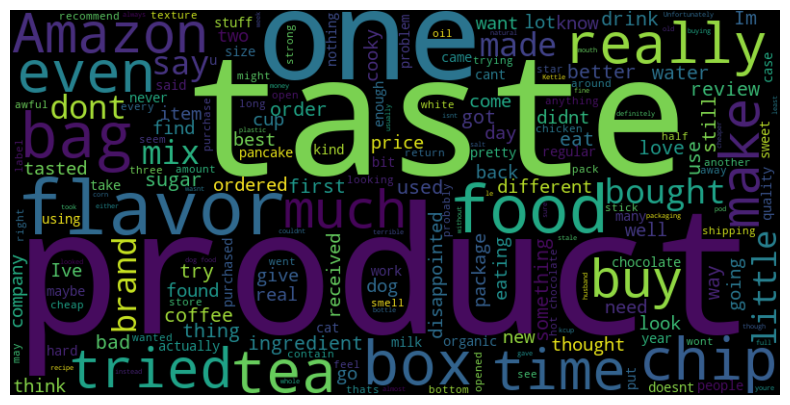

In [40]:
neg = " ".join(review for review in negative['Text'])

neg = re.sub(r'[^\w\s]', '', neg)  # удаление пунктуации
meg = pos.lower()  # приведение к нижнему регистру

tokens = word_tokenize(neg)

stop_words = set(stopwords.words('english'))
stop_words.update(["br", "href","good","great"]) 
filtered_tokens = [word for word in tokens if word not in stop_words]

# Лемматизация
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Объединение лемматизированных слов обратно в строку
processed_text = ' '.join(lemmatized_tokens)

# Создание wordcloud
wordcloud3 = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

# Отображение wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()